In [1]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Activation, Dropout
from keras.regularizers import l2
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing

Using Theano backend.


In [72]:
matrix_train = np.loadtxt('tem/train.txt')
matrix_test = np.loadtxt('tem/test.txt')

In [55]:
matrix_train = np.delete(matrix_train, 4, 1)
matrix_test = np.delete(matrix_test, 4, 1)
matrix_train = np.delete(matrix_train, 5, 1)
matrix_test = np.delete(matrix_test, 5, 1)

In [73]:
X_train, Y_train = (matrix_train[:, :-1], matrix_train[:, -1])
X_test, Y_test = (matrix_test[:, :-1], matrix_test[:, -1])

In [74]:
X_train_scale = preprocessing.scale(X_train)
X_test_scale = preprocessing.scale(X_test)

In [75]:
lr = linear_model.LogisticRegression(max_iter=1000)
l = lr.fit(X_train_scale, Y_train)
l.score(X_train_scale, Y_train)

0.63304981773997571

In [170]:
msk=np.argmax(lr.predict_proba(X_test_scale), axis=1)==np.argmax(Y_test_matrix, axis=1)
msk.cumsum()[-1]/len(msk)


0.88262870040802155

In [119]:
up = Y_test == 1
up.cumsum()[-1]/len(Y_test)

0.04522962062679052

In [76]:
msk1 = Y_train==0
msk2 = Y_train==1
msk3 = Y_train==2
Y_train_matrix = np.zeros((len(Y_train), 3))
Y_train_matrix[msk1, 0] = 1
Y_train_matrix[msk2, 1] = 1
Y_train_matrix[msk3, 2] = 1

In [78]:
Y_train_matrix


array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [77]:
msk1 = Y_test==0
msk2 = Y_test==1
msk3 = Y_test==2
Y_test_matrix = np.zeros((len(Y_test), 3))
Y_test_matrix[msk1, 0] = 1
Y_test_matrix[msk2, 1] = 1
Y_test_matrix[msk3, 2] = 1

In [79]:
inputs = Input(shape=(12,))
x = Dense(48, activation='sigmoid')(inputs)
#drop = Dropout(0.5)(x)
prediction = Dense(3, activation='sigmoid')(x)
model = Model(input=inputs, output=prediction)
model.compile(optimizer='adagrad',
              loss='poisson',
              metrics=['accuracy'])
model.fit(X_train_scale, Y_train_matrix, nb_epoch=500, batch_size=100)

Epoch 1/500
1646/1646 [==============================] - 0s - loss: 0.6221 - acc: 0.5407     
Epoch 2/500
1646/1646 [==============================] - 0s - loss: 0.5864 - acc: 0.5620     
Epoch 3/500
1646/1646 [==============================] - 0s - loss: 0.5764 - acc: 0.5802     
Epoch 4/500
1646/1646 [==============================] - 0s - loss: 0.5710 - acc: 0.5930     
Epoch 5/500
1646/1646 [==============================] - 0s - loss: 0.5677 - acc: 0.5978     
Epoch 6/500
1646/1646 [==============================] - 0s - loss: 0.5652 - acc: 0.6027     
Epoch 7/500
1646/1646 [==============================] - 0s - loss: 0.5633 - acc: 0.6051     
Epoch 8/500
1646/1646 [==============================] - 0s - loss: 0.5618 - acc: 0.6081     
Epoch 9/500
1646/1646 [==============================] - 0s - loss: 0.5608 - acc: 0.6191     
Epoch 10/500
1646/1646 [==============================] - 0s - loss: 0.5596 - acc: 0.6221     
Epoch 11/500
1646/1646 [==============================] - 0

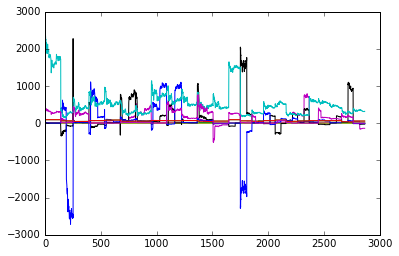

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
X = np.vstack((X_train, X_test))
plt.plot(X)


In [80]:
model.evaluate(X_test_scale, Y_test_matrix)


1216/1219 [============================>.] - ETA: 0s

[0.54825047457971177, 0.62346185402756737]

In [311]:
pred = model.predict(X_test_scale)
pred 

array([[ 0.01140451,  0.0952452 ,  0.01429499],
       [ 0.00931153,  0.20649451,  0.01847559],
       [ 0.04086139,  0.18169352,  0.00696454],
       ..., 
       [ 0.10288553,  0.87952256,  0.04538967],
       [ 0.07141645,  0.85641998,  0.05429037],
       [ 0.07618226,  0.88434786,  0.0551932 ]])

In [312]:
msk = np.argmax(Y_test_matrix, axis=1)==np.argmax(pred, axis=1)
msk.cumsum()[-1]/len(msk)

0.85991678224687929

In [125]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, lr.fit(X_train_scale, Y_train).predict(X_test_scale)))

             precision    recall  f1-score   support

       -1.0       0.12      0.02      0.04       734
        0.0       0.89      0.99      0.94     10264
        1.0       0.00      0.00      0.00       521

avg / total       0.80      0.88      0.84     11519



/home/lcc/anaconda3/envs/sensequant/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
np.argmax(pred, axis=1)

array([1, 1, 1, ..., 1, 1, 1])

In [440]:
from keras.utils.visualize_util import plot

RuntimeError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [20]:
import graphviz
import pydot